**Отчёт**

**Зачётное задание по предмету системы компьютерной математики**

**"Интерполяция. Длина Тормозного пути"**




Выполнено

студентом группы 382008-1

Пашиной Алиной Игоревной

**Задание**: (Моулер) В следующей таблице приведены данные о длине тормозного пути $d$ некоторого автомобиля в зависимости от его скорости $v$ в начале пути:

$$
\begin{array}{|c|c|c|c|c|c|c|}
\hline
v & 0  & 10 & 20 &30 &40 &50 &60 \\
\hline                  
d & 0  & 5 & 20 &46 &70 &102 &153\\
\hline
\end{array}
$$

Какова должна быть максимальная скорость автомобиля, чтобы длина тормозного пути не превосходила бы $60$? Написать программу (скрипт), решающую задачу следующими способами:

кусочной линейной интерполяцией,

кусочной кубической интерполяцией,

обратной кубической интерполяцией. Придумать и реализовать новый способ. Нарисовать графики построенных интерполянтов. Сравнить результаты.

**Решение**

Подключим необходимые библиотеки

In [35]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import linalg
from scipy import interpolate

Введём исходные данные и отобразим их на графике для большей наглядности.
Стоит отметить, что в исходных данных наблюдается увеличение длины пути при увеличении скорости в начале пути. Следовательно функция монотонна.Наибольшая скорость при тормозном пути, не превосходящем 60, будет в точке d=60. 

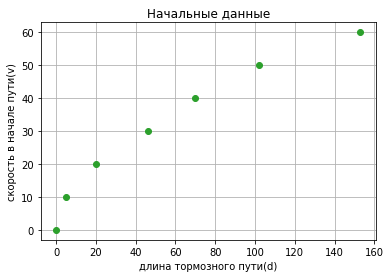

In [36]:
d=np.array([0,5,20,46,70,102,153])
v=np.array([0,10,20,30,40,50,60])
plt.title("Начальные данные")
plt.grid(True)
plt.plot(d,v,'o',color='tab:green')
plt.xlabel("длина тормозного пути(d)")
plt.ylabel("скорость в начале пути(v)")
pass

**Кусочно-линейная интерполяция**

Первым способом интерполирования, который мы рассмотрим, будет кусочно-линейная интерполяция. Это вид кусочно-полиномиальной функции, при котором на каждом отрезке $[x_j x_{j+1}]$ интерполянт представляет собой линейную функцию $L_j(x)$, при этом $L_j(x_j)=y_j$ и $L_j(x_{j+1})=y_{j+1}$


Выразим кусочно-кубическую интерполяцию нашей функции в качестве интерполяционного многочлена Лагранжа первой степени, где $d$ - аргумент функции, $v$  - значение функции

$v(d)=v_{i}\frac{(d-d_{i+1})}{(d_{i}-d_{i+1})}+v_{i+1}*\frac{(d-d_{i})}{(d_{i+1}-d_{i})}$

В качестве $d_{i}$ и $v_{i}$ возьмем координаты левой границы отрезка, к которому принадлежит $d=60$, в качестве $d_{i+1}$ и $v_{i+1}$ - правой границы.


In [37]:
d0=60 #заданная координата по d
i=6
while d[i]>d0:
  i=i-1
d1=d[i] #левая граница по d
v1=v[i] #левая граница по v
i=0
while d[i]<d0:
  i=i+1
d2=d[i]#правая граница по d
v2=v[i]#правая граница по v

v0=v1*(d0-d2)/(d1-d2)+v2*(d0-d1)/((d2-d1))
v0

35.83333333333333

Аналогичный результат мы можем получить с помощью функции np.interp()

In [38]:
np.interp(60,d,v)

35.833333333333336

**Кусочно-кубическая интерполяция**

Второй способ интерполирования, который мы рассмотрим, - кусочно-кубическая интерполяция, где на каждом отрезке $[x_j x_{j+1}]$ интерполянт представляет собой кубическую функцию $S_j(x)$, при этом $S_j(x_j)=y_j$ и $S_j(x_{j+1})=y_{j+1}$; кроме того интерполянт имеет непрерывную первую и вторую производные во всех неконцевых узловых точках и нулевые вторые производные в концевых точках $x_0$ и $x_{n-1}$ (естественный сплайн)

In [63]:

spline3 = interpolate.interp1d(d, v, kind = 'cubic')
spline3(60)

array(36.00342639)

**Обратная кубическая интерполяция**



Интерполяционного многочлен Лагранжа третьей степени выглядит следующим образом:

$v(d)=v_{n-3}\frac{(d-d_{n-2})(d-d_{n-1})(d-d_{n})}{(d_{n-3}-d_{n-2})(d_{n-3}-d_{n-1})(d_{n-3}-d_{n})}+v_{n-2}*\frac{(d-d_{n-3})(d-d_{n-1})(d-d_{n})}{(d_{n-2}-d_{n-3})(d_{n-2}-d_{n-1})(d_{n-2}-d_{n})}+v_{n-1}*\frac{(d-d_{n-3})(d-d_{n-2})(d-d_{n})}{(d_{n-1}-d_{n-3})(d_{n-1}-d_{n-2})(d_{n-1}-d_{n})}+v_{n}*\frac{(d-d_{n-3})(d-d_{n-2})(d-d_{n-1})}{(d_{n}-d_{n-3})(d_{n}-d_{n-2})(d_{n}-d_{n-1})}$



Рассмотрим 4 точки $d_{n-3},d_{n-2},d_{n-1},d_{n} $ как значения функции от аргументов $f_{n-3},f_{n-2},f_{n-1},f_{n}$ соответственно. Интерполяционный многочлен Лагранжа для этих точек будет выглядеть следующим образом:

$f(v)^{-1}=d_{n-3}\frac{(v-v_{n-2})(v-v_{n-1})(v-v_{n})}{(v_{n-3}-v_{n-2})(v_{n-3}-v_{n-1})(v_{n-3}-v_{n})}+d_{n-2}*\frac{(v-v_{n-3})(v-v_{n-1})(v-v_{n})}{(v_{n-2}-v_{n-3})(v_{n-2}-v_{n-1})(v_{n-2}-v_{n})}+d_{n-1}*\frac{(v-v_{n-3})(v-v_{n-2})(v-v_{n})}{(v_{2}-v_{n-3})(v_{n-1}-v_{n-2})(v_{n-1}-v_{n})}+d_{n}*\frac{(v-v_{n-3})(v-v_{n-2})(v-v_{n-1})}{(v_{n}-v_{n-3})(v_{n}-v_{n-2})(v_{n}-v_{n-1})}$

Для того, чтобы найти  $v$ при $d=60$ с помощью формулы обратной кубической интерполяции,будем перебирать $v$ с точностью до десятых, пока не получим наиболее близкое значение к 60. Учитывая, что функция монотонно возрастает, и то, что $46<60<70$, для перебора значений будем рассматривать промежуток при $v_{2}=30$ и $v_{3}=40$

In [50]:
d=np.array([0,5, 20,46,70,102,153])
v=np.array([0,10,20,30,40,50,60])

v1=v[2]
v2=v[3]
v3=v[4]
v4=v[5]
v0=v2

d1=d[2]
d2=d[3]
d3=d[4]
d4=d[5]

res=100 # переменная для хранения искомого значения v
delta=60 # наименьшая разница между 60 и полученным d0
while (v0<v3):
  d0=d1*(v0-v2)*(v0-v3)*(v0-v4)/((v1-v2)*(v1-v3)*(v1-v4))
  d0+=d2*(v0-v1)*(v0-v3)*(v0-v4)/((v2-v1)*(v2-v3)*(v2-v4))
  d0+=d3*(v0-v1)*(v0-v2)*(v0-v4)/((v3-v1)*(v3-v2)*(v3-v4))
  d0+=d4*(v0-v1)*(v0-v2)*(v0-v3)/((v4-v1)*(v4-v2)*(v4-v3))
  if (delta>abs(60-d0)):
    res=v0
    delta=60-d0
  v0+=0.1
print(res)

36.000000000000085


**Построение графиков интерполяции**

Учитывая, что обратная кубическая интерполяция не является встроенной функцией, вычислим несколько её значений и сделаем их основой для построения графика.

In [52]:
d=np.array([0,5, 20,46,70,102,153])
v=np.array([0,10,20,30,40,50,60])
newd=np.array([ ] ,dtype=np.float)#массив для хранения полученных значений d0
newv=np.array([ ] ,dtype=np.float)#массив для хранения y0

#Вычислим значения d0, для точек, у которых 0<=v<30
v1=v[0]
v2=v[1]
v3=v[2]
v4=v[3]
v0=v1

d1=d[0]
d2=d[1]
d3=d[2]
d4=d[3]

while (v0<v4):
  d0=d1*(v0-v2)*(v0-v3)*(v0-v4)/((v1-v2)*(v1-v3)*(v1-v4))
  d0+=d2*(v0-v1)*(v0-v3)*(v0-v4)/((v2-v1)*(v2-v3)*(v2-v4))
  d0+=d3*(v0-v1)*(v0-v2)*(v0-v4)/((v3-v1)*(v3-v2)*(v3-v4))
  d0+=d4*(v0-v1)*(v0-v2)*(v0-v3)/((v4-v1)*(v4-v2)*(v4-v3))
  newd=np.append(newd,d0)
  newv=np.append(newv,v0)
  v0+=1
#Вычислим значения d0, для точек, у которых 30<=v<155
v1=v[3]
v2=v[4]
v3=v[5]
v4=v[6]
v0=v1

d1=d[3]
d2=d[4]
d3=d[5]
d4=d[6]

while (v0<v4+2):
  d0=d1*(v0-v2)*(v0-v3)*(v0-v4)/((v1-v2)*(v1-v3)*(v1-v4))
  d0+=d2*(v0-v1)*(v0-v3)*(v0-v4)/((v2-v1)*(v2-v3)*(v2-v4))
  d0+=d3*(v0-v1)*(v0-v2)*(v0-v4)/((v3-v1)*(v3-v2)*(v3-v4))
  d0+=d4*(v0-v1)*(v0-v2)*(v0-v3)/((v4-v1)*(v4-v2)*(v4-v3))
  newd=np.append(newd,d0)
  newv=np.append(newv,v0)
  v0+=1

Нарисуем график построенных интерполянтов

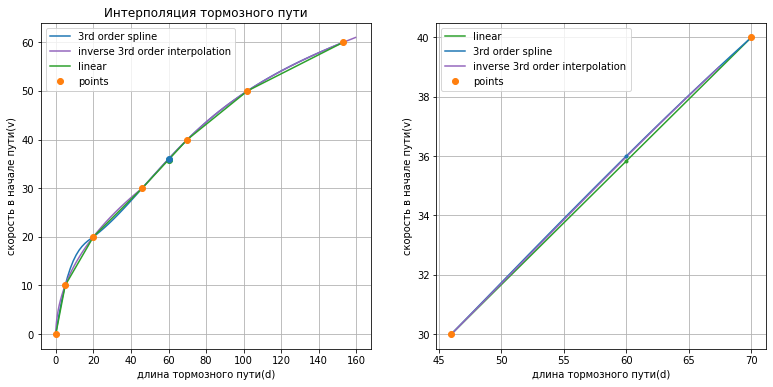

In [65]:
cusochline = interpolate.interp1d(d, v,kind='linear')
spline3 = interpolate.interp1d(d, v, kind = 'cubic')

plt.figure(figsize = (13, 6))

plt.subplot(1, 2, 1)
plt.title("Интерполяция тормозного пути")
xx = np.linspace(np.min(d), np.max(d), 100)
plt.grid(True)
plt.xlabel("длина тормозного пути(d)")
plt.ylabel("скорость в начале пути(v)")
plt.plot(xx, spline3(xx), color = 'tab:blue', label = '3rd order spline')
plt.plot(newd,newv,color='tab:purple',  label = 'inverse 3rd order interpolation')
plt.plot(xx, cusochline(xx),   color = 'tab:green',  label = 'linear')
plt.plot(d, v, 'o',       color = 'tab:orange',   label = 'points')
plt.plot(dd, np.interp(60,d,v), 'o',       color = 'tab:green')
plt.plot(60, vv0, 'o',       color = 'tab:blue')
plt.legend(loc = 2)

plt.subplot(1, 2, 2)
xx = np.linspace(d[3], d[4], 300)
plt.grid(True)
plt.xlabel("длина тормозного пути(d)")
plt.ylabel("скорость в начале пути(v)")
plt.plot(xx, cusochline(xx),   color = 'tab:green',  label = 'linear')
plt.plot(xx, spline3(xx), color = 'tab:blue', label = '3rd order spline')
plt.plot(newd[30:40],newv[30:40],color='tab:purple',  label = 'inverse 3rd order interpolation')
plt.plot(d[3:5], v[3:5], 'o',       color = 'tab:orange',   label = 'points')
plt.plot(60, np.interp(60,d,v), 'o',       color = 'tab:green',ms='3')
plt.plot(60, spline3(60), 'o',       color = 'tab:blue',ms='3')
plt.plot(60, res, 'o',       color = 'tab:purple',ms='3')

plt.legend(loc = 2)

pass

**Вывод**

Мы проинтерполировали исходный набор данных 3 способами, чтобы выяснить наибольшую начальную скорость при тормозном пути равном 60.
1.   При интерполировании различными способами, результаты получились различными, но схожими между собой. Они близки к значению $v=36$.  Линейная интерполяция отличается от кубических на 0.2 , разница между кусочно-кубической интерполяцией и обратной кубической интерполяцией около 0.0034.  
2.   Наибольшую эффективность в этой задаче показала кусочно-кубическая интерполяция, благодаря плавности графика, близости к реальным значениям начальных данных и удобству использования.
